In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.stats as stats
import matplotlib

greens = ['#8EB897', "#004225", "#529471", "#48b5c4", "#529471"]
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'

In [2]:

plt.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
results_path = "/Volumes/noamaz/modularity/digits/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "digits"
num_layers = '3'
n_features = 3
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"digits_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/digits_multi_arch/{res_folder}"

In [4]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-26-13-45-59_all_results_from_teach_archs_results_with_motifs_1000_ep_no_duplicates_fixed.csv"
lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'


In [5]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [45]:
for file_name in os.listdir(lgb_res_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    if '2023-12-24' in file_name:
        feature_selection_res = pd.read_csv(f"{lgb_res_path}/{file_name}")
feature_selection_res = feature_selection_res.sort_values('num_features')

In [46]:
feature_selection_res

,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var
5,5,2023-11-27-13-19-33_masked_data_1_features,1,0.138652,0.015050,0.137911,0.014778
6,6,2023-11-27-14-20-09_masked_data_2_features,2,0.032252,0.001322,0.032968,0.001401
0,0,2023-11-27-14-19-53_masked_data_3_features,3,0.023995,0.000621,0.024326,0.000664
9,9,2023-11-27-14-19-44_masked_data_4_features,4,0.060532,0.004196,0.061700,0.004485
12,12,2023-11-27-14-19-39_masked_data_5_features,5,0.042144,0.001293,0.042714,0.001363
4,4,2023-11-27-14-19-53_masked_data_6_features,6,0.028475,0.001070,0.029228,0.001153
1,1,2023-11-27-17-09-22_masked_data_7_features,7,0.024699,0.000593,0.025425,0.000649
8,8,2023-11-27-14-20-09_masked_data_8_features,8,0.030301,0.001035,0.031041,0.001100
11,11,2023-11-27-14-20-09_masked_data_9_features,9,0.026744,0.000738,0.027311,0.000810
3,3,2023-11-27-14-20-09_masked_data_10_features,10,0.027935,0.000674,0.028441,0.000715


In [47]:
baseline_path = f"{results_path}/{res_folder}/random_feature_selection/{n_features}_features/"
for file_name in os.listdir(baseline_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    res_baseline = pd.read_csv(f"{baseline_path}/{file_name}")

In [48]:
os.listdir(baseline_path)

['teach_archs_regression_feature_selection_results_1kep',
 'masked_data_models',
 '2023-12-18-15-46-29_all_exp_mape_prediction_results.csv']

In [49]:
corr_path = f"{results_path}/{res_folder}/feature_correlation/{n_features}_features/"
corr_baseline_res = pd.DataFrame()
for file_name in os.listdir(corr_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    corr_baseline_res = pd.read_csv(f"{corr_path}/{file_name}")

In [50]:
globality_path = f"{results_path}/{res_folder}/feature_globality/{n_features}_features/"
globality_baseline_res = pd.DataFrame()
for file_name in os.listdir(globality_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    globality_baseline_res = pd.read_csv(f"{globality_path}/{file_name}")

In [51]:
globality_baseline_res = globality_baseline_res[globality_baseline_res['mape'] <= 0.5]

<Figure size 640x480 with 0 Axes>

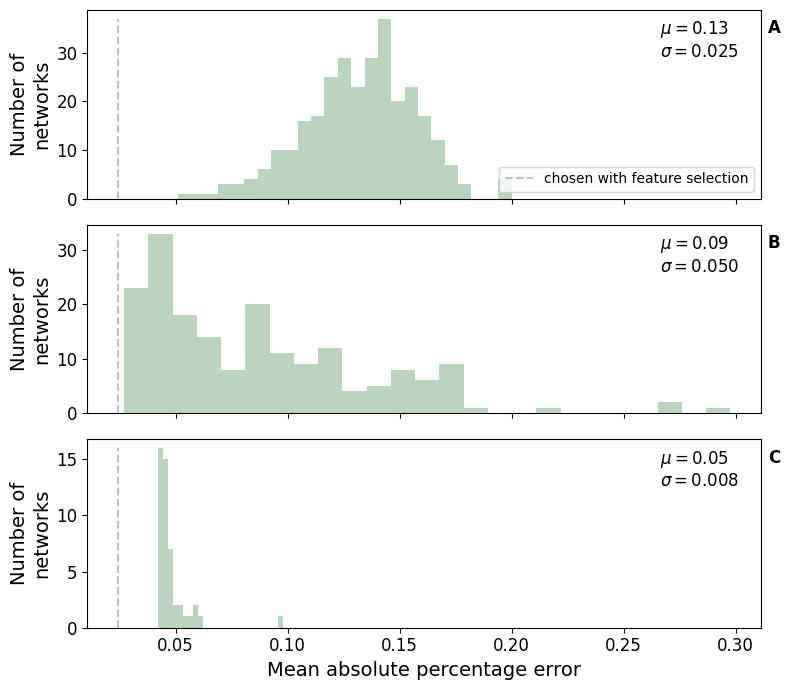

In [52]:
feature_sellection_val = feature_selection_res['test_mape'][
    feature_selection_res['num_features'] == n_features].item()

all_data = [
    res_baseline['mape'],
    globality_baseline_res['mape'],
    corr_baseline_res['mape'],
]
labels = [
    'randomly chosen features',
    'globality based randomly chosen features',
    'correlation based chosen features'
]
nums=['A', 'B', 'C']
plt.figure()
fig, axs = plt.subplots(3, 1, figsize=(8, 7), sharex='all')
for i, (baseline, lab) in enumerate(zip(all_data, labels)):
    mu, std = stats.norm.fit(baseline)
    n, _, _ = axs[i].hist(baseline, bins=25, alpha=0.6, color=greens[0])
    #axs[i].set_title(f"{lab}", fontsize=13)
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu),
        r'$\sigma=%.3f$' % (std)))
    axs[i].text(0.85, 0.95, textstr, transform=axs[i].transAxes, fontsize=12, verticalalignment='top', )
    axs[i].text(1.01, 0.95, nums[i], transform=axs[i].transAxes, fontsize=12, verticalalignment='top',  weight="bold")
    axs[i].vlines(x=feature_sellection_val, ymin=0,
                  ymax=max(n), colors='grey', linestyles='--', alpha=0.5,
                  label='chosen with feature selection')
    axs[i].set_ylabel('Number of\nnetworks', fontsize=14)
    axs[i].tick_params(axis='both',  labelsize=12)
axs[2].set_xlabel('Mean absolute percentage error', fontsize=14)
axs[0].legend(loc='lower right', )
#plt.suptitle(f'Digit recognition - performance of alternative feature selection methods', fontsize=13)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_swapping.png")
plt.show()

In [53]:
for a in all_data:
    print(round(a.mean(), 4), round(a.min(), 4))

0.1322 0.0509
0.087 0.027
0.0479 0.042


In [7]:
all_f_names = pd.read_csv(f"{results_path}/{res_folder}/all_feature_names.csv")['0'].tolist()

In [8]:
all_f_names

['connectivity_ratio',
 'num_connections',
 'max_possible_connections',
 'out_connections_per_layer_(0_ 3) ',
 'out_connections_per_layer_(0_ 4) ',
 'out_connections_per_layer_(0_ 6) ',
 'out_connections_per_layer_(0_ 11) ',
 'out_connections_per_layer_(0_ 12) ',
 'out_connections_per_layer_(0_ 21) ',
 'out_connections_per_layer_(0_ 22) ',
 'out_connections_per_layer_(0_ 25) ',
 'out_connections_per_layer_(0_ 30) ',
 'out_connections_per_layer_(0_ 33) ',
 'out_connections_per_layer_(0_ 37) ',
 'out_connections_per_layer_(0_ 38) ',
 'out_connections_per_layer_(0_ 42) ',
 'out_connections_per_layer_(0_ 43) ',
 'out_connections_per_layer_(0_ 51) ',
 'out_connections_per_layer_(0_ 59) ',
 'out_connections_per_layer_(0_ 60) ',
 'out_connections_per_layer_(0_ 63) ',
 'out_connections_per_layer_(1_ 0) ',
 'out_connections_per_layer_(1_ 1) ',
 'out_connections_per_layer_(1_ 2) ',
 'out_connections_per_layer_(1_ 3) ',
 'out_connections_per_layer_(1_ 4) ',
 'out_connections_per_layer_(1_ 5) ',
 

In [9]:
globality_level = {
    1: [
        'connectivity_ratio',
        'num_connections',
        'max_possible_connections',
        'motifs_count',
        'dimensions',
        'num_layers',
        'num_neurons'
    ],
    0.75: [
        'total_connectivity_ratio_between_layers',
        'max_connectivity_between_layers_per_layer',
        'layer_connectivity_rank',
    ],
    0.5: [
        'distances_between_input_neuron',
        'num_paths_to_output_per_input_neuron',
        'num_involved_neurons_in_paths_per_input_neuron',
    ],
    0: [
        'out_connections_per_layer',
        'in_connections_per_layer',
    ]
}


def get_glob_level(feature_full_name):
    for globality_idx, features_list in globality_level.items():
        for f in features_list:
            if f == 'connectivity_ratio' and f != feature_full_name:
                continue
            if f in feature_full_name:
                return globality_idx


In [10]:
single_feature_path = f"{results_path}/{res_folder}/single_feature_prediction/"
single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{single_feature_path}/{file_name}")
    feature_ind = int(file_name.split('feature_')[1].split('_best.csv')[0]) - 1
    temp['feature_ind'] = feature_ind
    feature_name = all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    temp['feature_globality_level'] = get_glob_level(feature_name)
    single_feature_baseline_res = pd.concat([single_feature_baseline_res, temp], ignore_index=True)

In [11]:
single_feature_baseline_res['best_']

KeyError: 'best_'

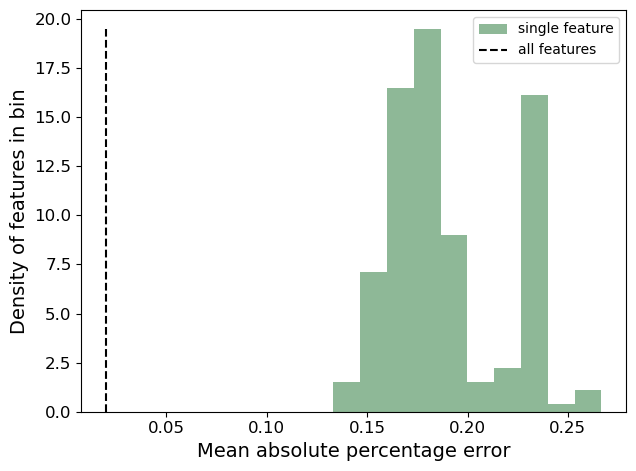

In [14]:
n, _, _ = plt.hist(single_feature_baseline_res['best mape test'], density=True, color=greens[0], label='single feature')
feature_sellection_max_val = 0.01996444322560963
plt.vlines(x=feature_sellection_max_val, ymin=0,
           ymax=max(n), colors='black', linestyles='--',
           label='all features')
plt.xlabel('Mean absolute percentage error', fontsize=14)
plt.ylabel('Density of features in bin', fontsize=14)
#plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features.png")
plt.show()

In [60]:
for a, l in zip(all_data, labels):
    print(f"{l}: {round(a.mean(), 4), round(a.min(), 4)}")

randomly chosen features: (0.1322, 0.0509)
globality based randomly chosen features: (0.087, 0.027)
correlation based chosen features: (0.0479, 0.042)


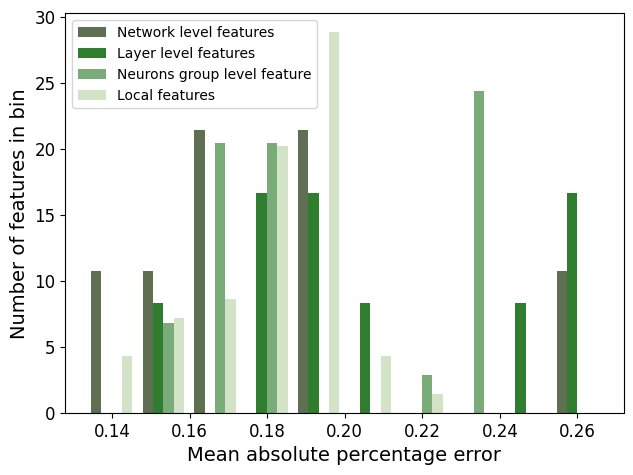

In [61]:
g_single_feature_baseline_res = [
    single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level]['best mape test']
    for g_level in globality_level.keys()
]
glob_levels_names = {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons group level feature",
    0: "Local features"
}
sorted_greens = ['#706233', '#228B22', '#A7D397', '#D2DE32', ]

sorted_greens = ["#4F6F52",
                 "#739072",
                 "#86A789",
                 "#D2E3C8", ]
sorted_greens = ["#5F6F52",
                 '#2f7e2f',
                 "#79AC78",
                 "#D2E3C8", ]
n, p, b = plt.hist(g_single_feature_baseline_res, bins=10, density=True,

                   color=sorted_greens, label=list(glob_levels_names.values())
                   )
plt.xlabel('Mean absolute percentage error', fontsize=14)
plt.ylabel('Number of features in bin', fontsize=14)
#plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper left')
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features_by_glob.png")
plt.show()

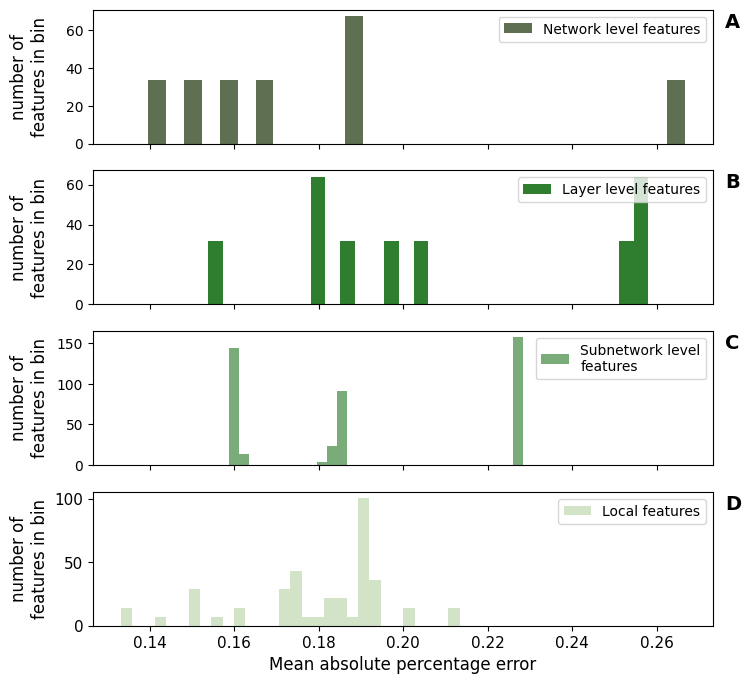

In [81]:
g_single_feature_baseline_res = [
    single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level]['best mape test']
    for g_level in globality_level.keys()
]
glob_levels_names = {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Subnetwork level features",
    0: "Local features"
}
sorted_greens = ["#5F6F52",
                 '#2f7e2f',
                 "#79AC78",
                 "#D2E3C8", ]
nums=['A', 'B', 'C', 'D']
f, ax = plt.subplots(4,1, figsize=(8,8), sharex='all', )
for i, g_level in enumerate(globality_level.keys()):
    n, p, b = ax[i].hist(single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level][
                             'best mape test'], bins=30, density=True,
                         color=sorted_greens[i], label=textwrap.fill(glob_levels_names[g_level], width=22,
                                           break_long_words=False))

    ax[i].text(1.02, 0.98, nums[i], transform=ax[i].transAxes, fontsize=14, verticalalignment='top', weight="bold")
    ax[i].set_ylabel('number of\nfeatures in bin', fontsize=12)
    ax[i].legend(loc='upper right')

f.align_ylabels(ax[:])
plt.xlabel('Mean absolute percentage error', fontsize=12)
#plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
#plt.tight_layout()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features_by_glob.png")
plt.show()